In [1]:
import sys
import serial
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
import skrf as rf
sys.path.append("gpib_instrument_control")
import gpib_instrument_control.hp_8700_series_vna

v=gpib_instrument_control.hp_8700_series_vna.Hp8753A();
cks=serial.Serial('/dev/ttyUSB0', 115200)

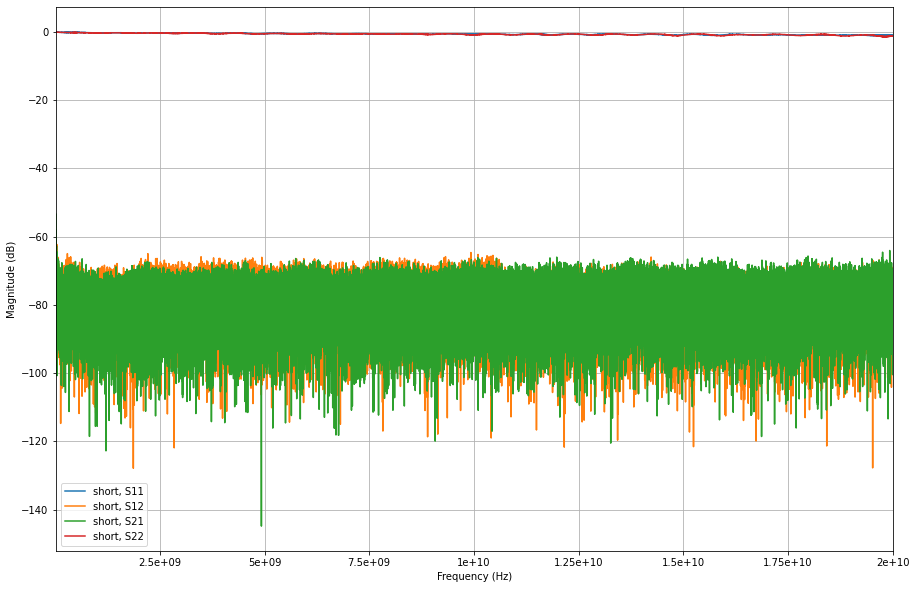

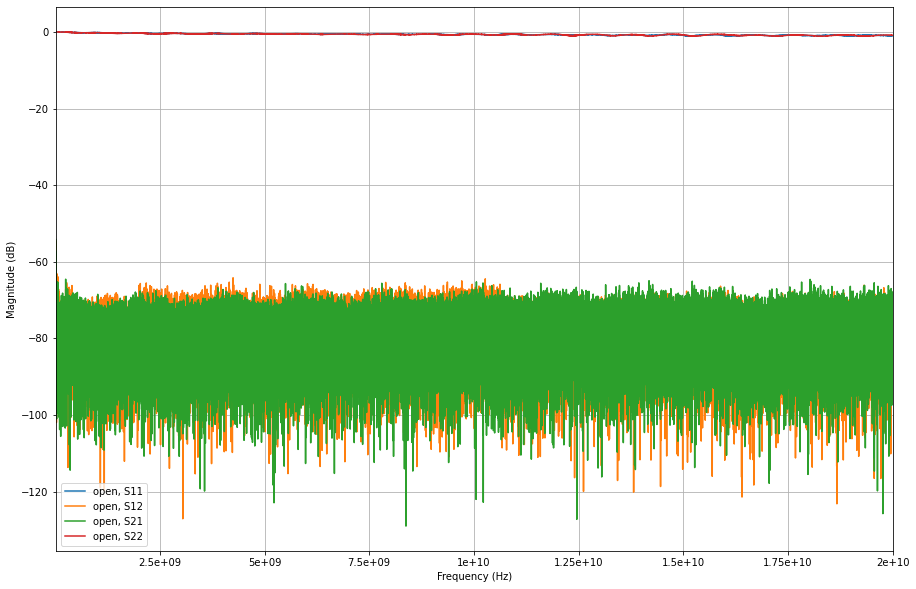

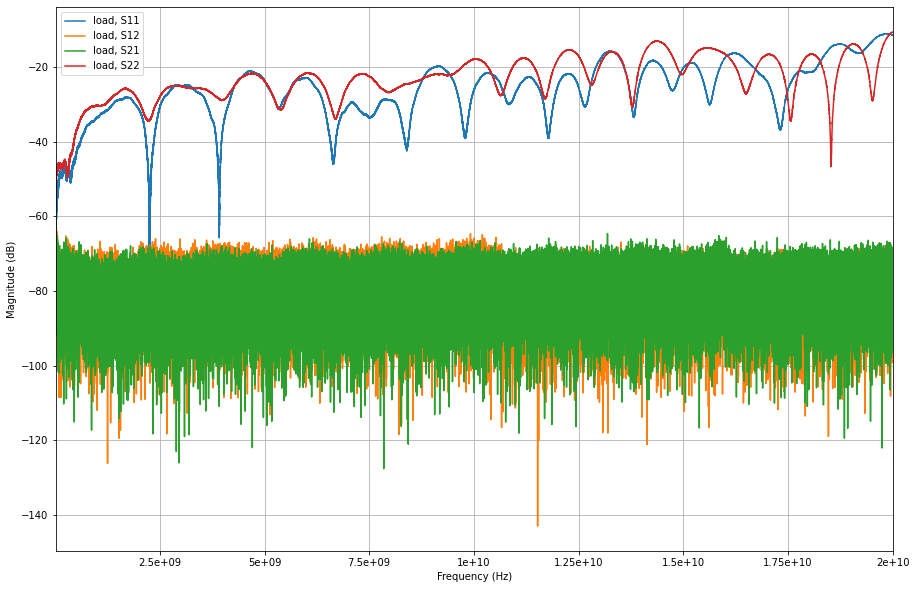

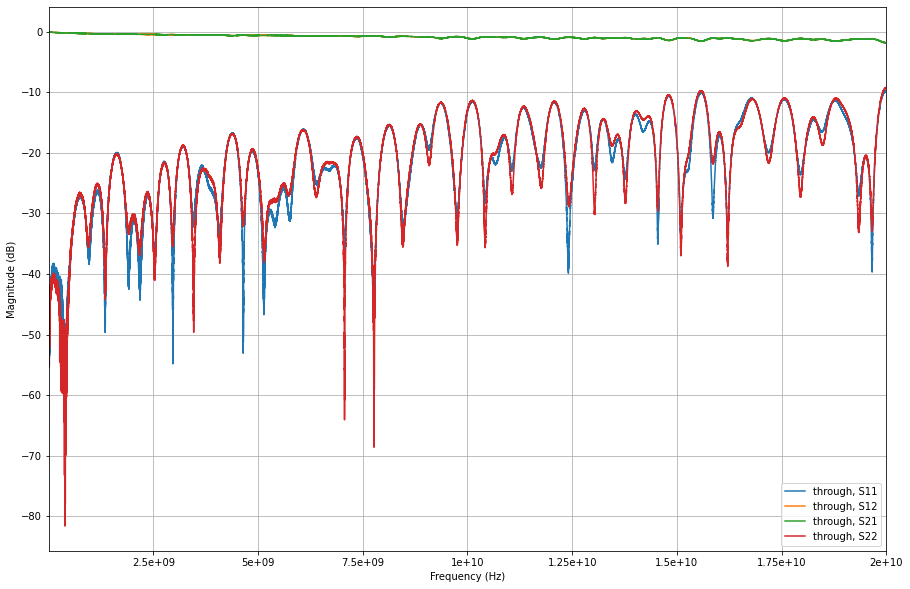

In [2]:
s_short=rf.Network('cal_stds/short.s2p')
s_open=rf.Network('cal_stds/open.s2p')
s_load=rf.Network('cal_stds/load.s2p')
s_through=rf.Network('cal_stds/through.s2p')

s_short.plot_s_db()
plt.grid(True)
plt.figure()

s_open.plot_s_db()
plt.grid(True)
plt.figure()

s_load.plot_s_db()
plt.grid(True)
plt.figure()

s_through.plot_s_db()
plt.grid(True)

ideals=[s_short, s_open, s_load, s_through]

In [4]:
cks.write(b'S')
v.setPoints(1601)
m_short=v.getScikitRfNetworkSparameters()
m_short.write_touchstone('cal_current/short2.s2p')

cks.write(b'O')
m_open=v.getScikitRfNetworkSparameters()
m_open.write_touchstone('cal_current/open2.s2p')

cks.write(b'L')
m_load=v.getScikitRfNetworkSparameters()
m_load.write_touchstone('cal_current/load2.s2p')

cks.write(b'T')
m_through=v.getScikitRfNetworkSparameters()
m_through.write_touchstone('cal_current/through2.s2p')


measured=[m_short, m_open, m_load, m_through]

100%|██████████| 4/4 [01:24<00:00, 21.08s/it]


Success
Success
Success
Success


/home/bjohan/.local/lib/python3.8/site-packages/skrf/calibration/calibration.py:1454: UserWarning: n_thrus is None, guessing which stds are transmissive
  warn('n_thrus is None, guessing which stds are transmissive')


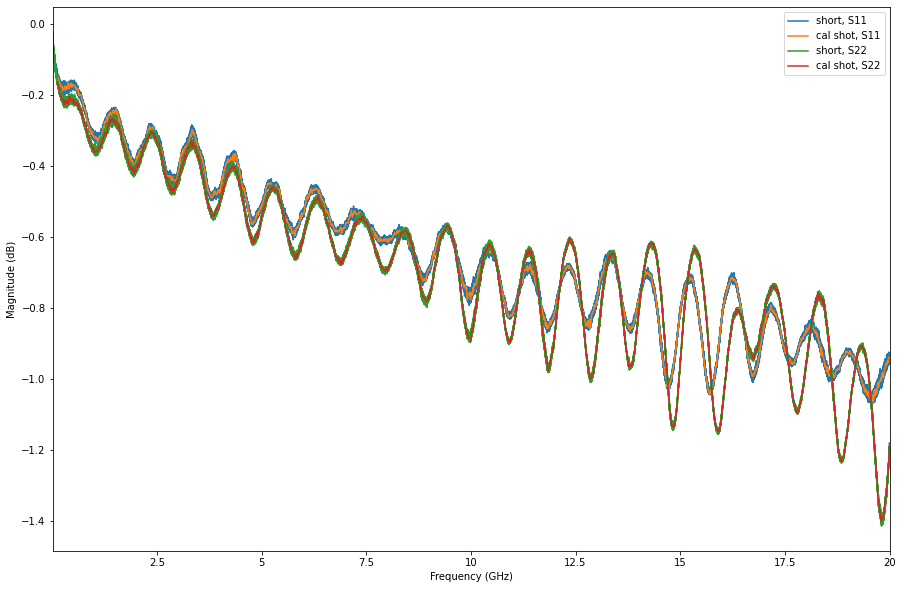

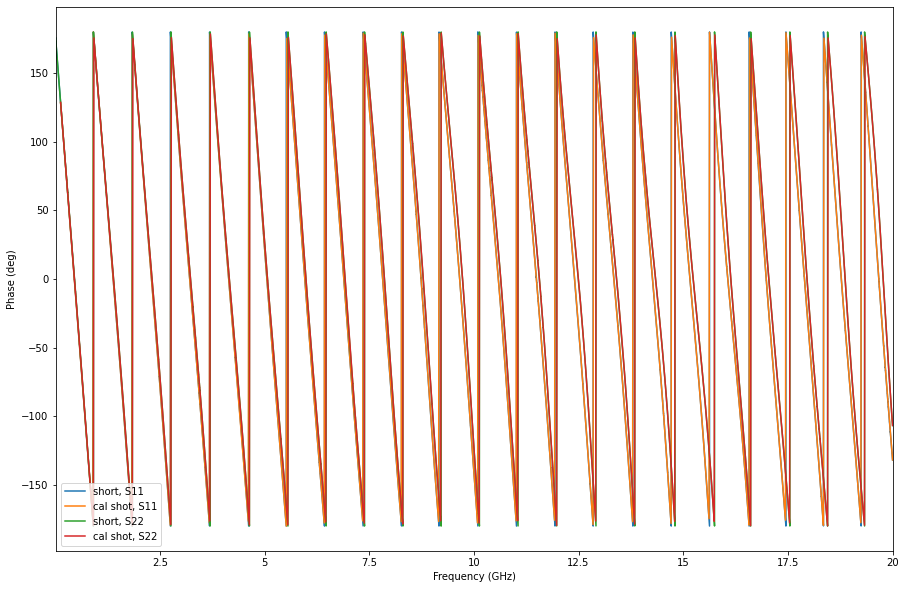

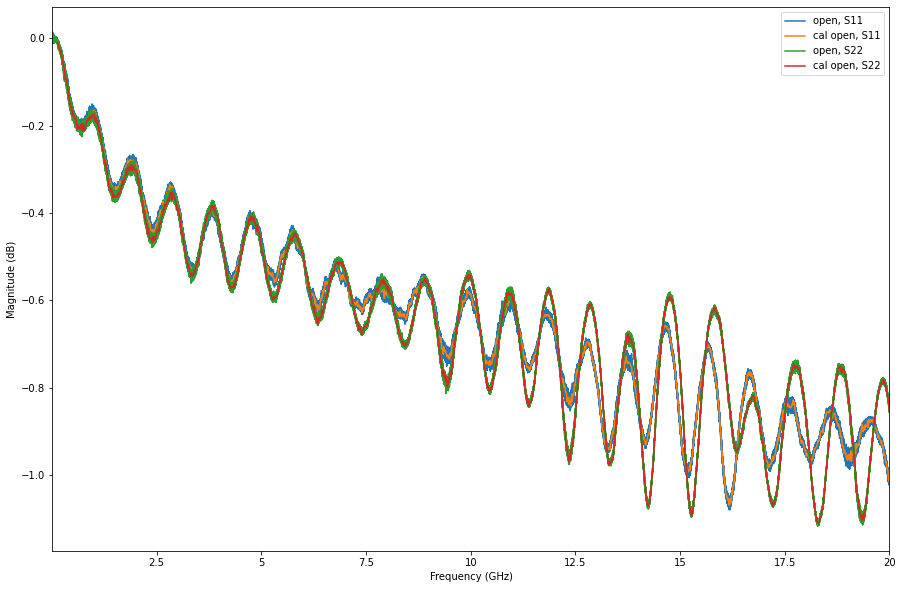

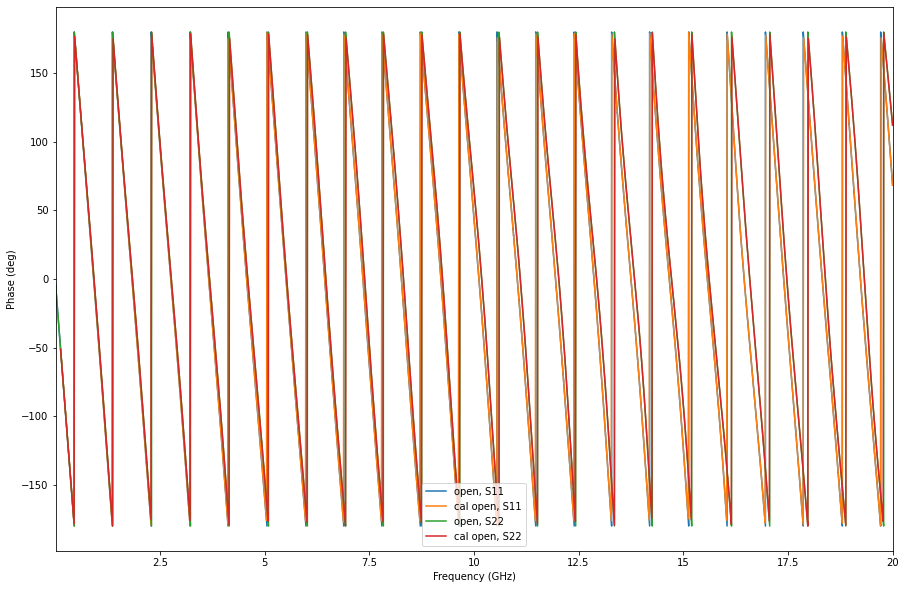

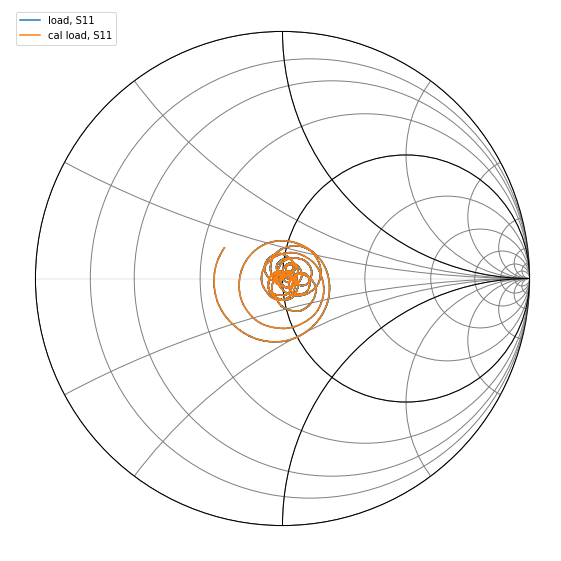

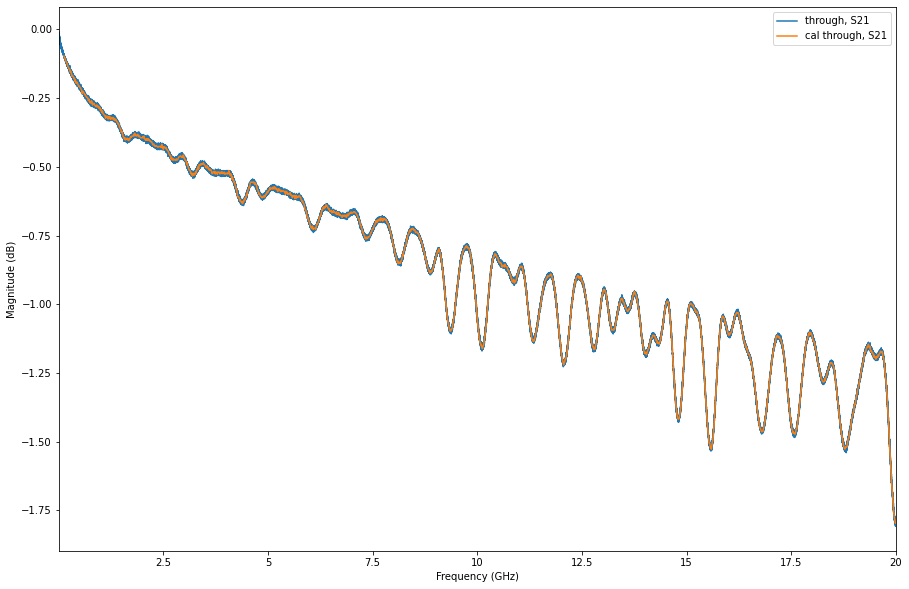

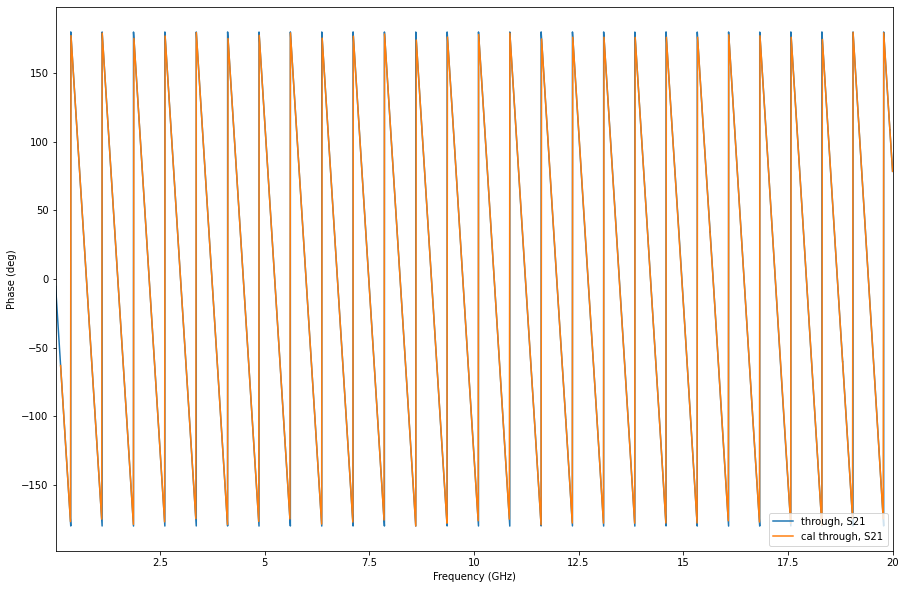

In [8]:
from skrf.calibration import TwelveTerm
import numpy as np

m_short=rf.Network('cal_current/short2.s2p')
m_open=rf.Network('cal_current/open2.s2p')
m_load=rf.Network('cal_current/load2.s2p')
m_through=rf.Network('cal_current/through2.s2p')

measured=[m_short, m_open, m_load, m_through]
cal = TwelveTerm(ideals = ideals, measured = measured)
cal.run()
cal_short = cal.apply_cal(m_short)
cal_short.name='cal shot'

cal_open = cal.apply_cal(m_open)
cal_open.name='cal open'

cal_load = cal.apply_cal(m_load)
cal_load.name='cal load'

cal_through = cal.apply_cal(m_through)
cal_through.name='cal through'


s_short.plot_s_db(m=0,n=0)
cal_short.plot_s_db(m=0,n=0)
s_short.plot_s_db(m=1,n=1)
cal_short.plot_s_db(m=1,n=1)

plt.figure()
s_short.plot_s_deg(m=0,n=0)
cal_short.plot_s_deg(m=0,n=0)
s_short.plot_s_deg(m=1,n=1)
cal_short.plot_s_deg(m=1,n=1)



plt.figure()
s_open.plot_s_db(m=0,n=0)
cal_open.plot_s_db(m=0,n=0)
s_open.plot_s_db(m=1,n=1)
cal_open.plot_s_db(m=1,n=1)

plt.figure()
s_open.plot_s_deg(m=0,n=0)
cal_open.plot_s_deg(m=0,n=0)
s_open.plot_s_deg(m=1,n=1)
cal_open.plot_s_deg(m=1,n=1)



plt.figure()
s_load.plot_s_smith(m=0,n=0)
cal_load.plot_s_smith(m=0,n=0)

plt.figure()
s_through.plot_s_db(m=1,n=0)
cal_through.plot_s_db(m=1,n=0)

plt.figure()
s_through.plot_s_deg(m=1,n=0)
cal_through.plot_s_deg(m=1,n=0)

In [6]:
cks.write(b'S')
v.setPoints(1601)
m2_short=v.getScikitRfNetworkSparameters()

cks.write(b'O')
m2_open=v.getScikitRfNetworkSparameters()

cks.write(b'L')
m2_load=v.getScikitRfNetworkSparameters()

cks.write(b'T')
m2_through=v.getScikitRfNetworkSparameters()

100%|██████████| 4/4 [01:24<00:00, 21.10s/it]


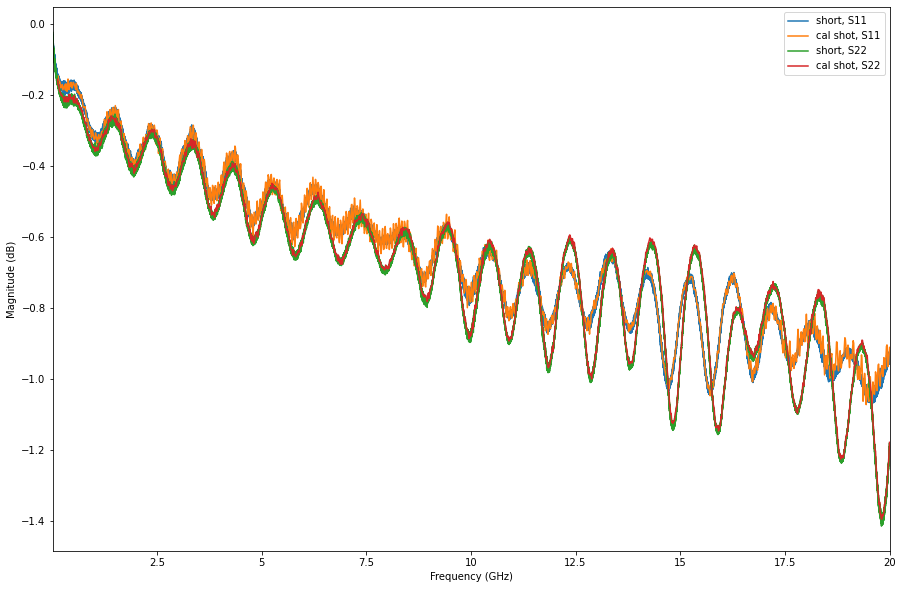

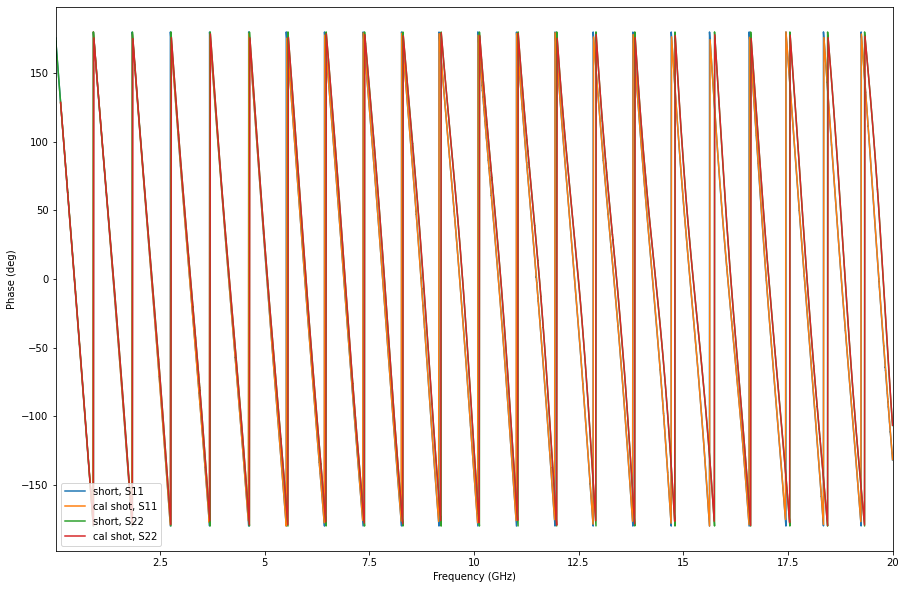

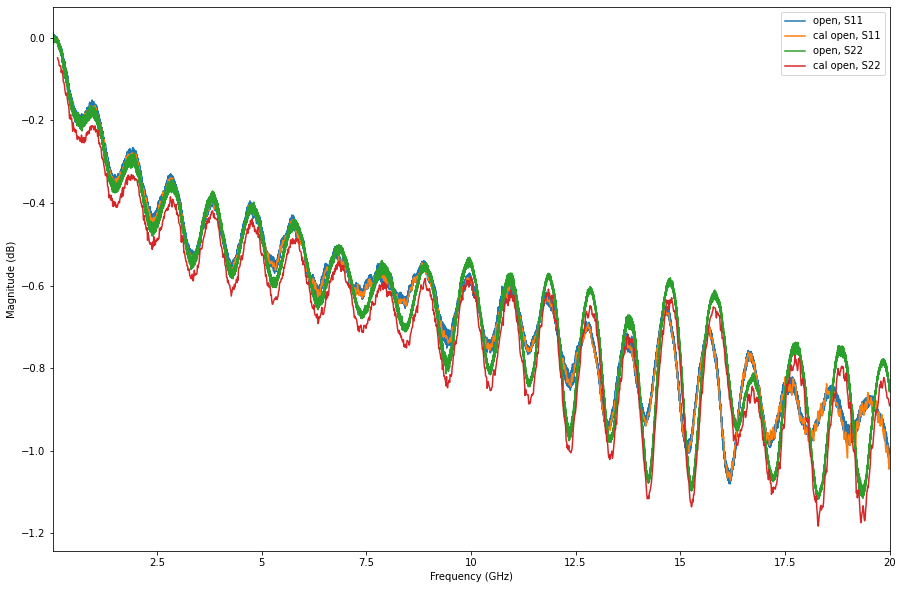

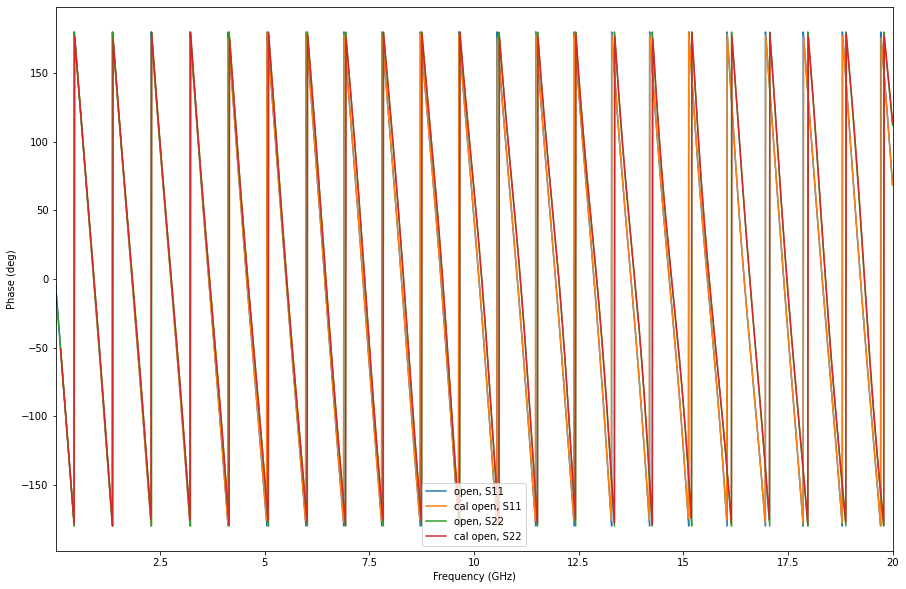

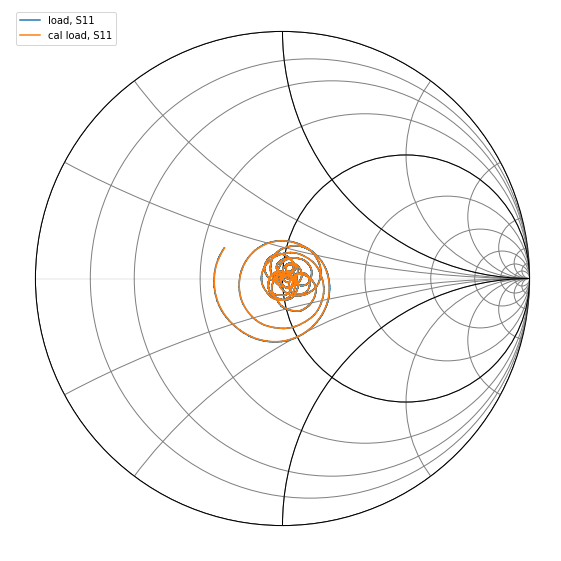

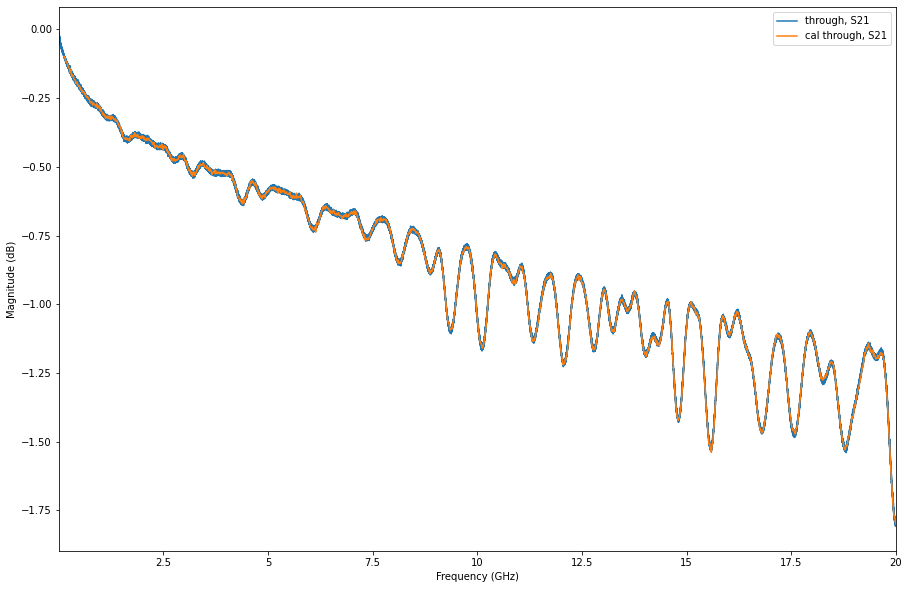

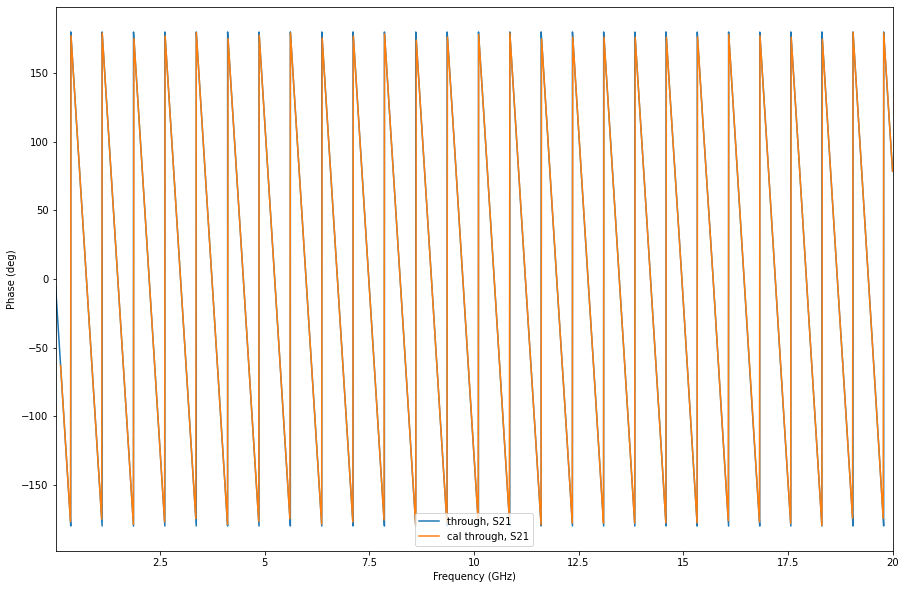

In [9]:
from skrf.calibration import TwelveTerm
import numpy as np


cal_short = cal.apply_cal(m2_short)
cal_short.name='cal shot'

cal_open = cal.apply_cal(m2_open)
cal_open.name='cal open'

cal_load = cal.apply_cal(m2_load)
cal_load.name='cal load'

cal_through = cal.apply_cal(m2_through)
cal_through.name='cal through'


s_short.plot_s_db(m=0,n=0)
cal_short.plot_s_db(m=0,n=0)
s_short.plot_s_db(m=1,n=1)
cal_short.plot_s_db(m=1,n=1)

plt.figure()
s_short.plot_s_deg(m=0,n=0)
cal_short.plot_s_deg(m=0,n=0)
s_short.plot_s_deg(m=1,n=1)
cal_short.plot_s_deg(m=1,n=1)



plt.figure()
s_open.plot_s_db(m=0,n=0)
cal_open.plot_s_db(m=0,n=0)
s_open.plot_s_db(m=1,n=1)
cal_open.plot_s_db(m=1,n=1)

plt.figure()
s_open.plot_s_deg(m=0,n=0)
cal_open.plot_s_deg(m=0,n=0)
s_open.plot_s_deg(m=1,n=1)
cal_open.plot_s_deg(m=1,n=1)



plt.figure()
s_load.plot_s_smith(m=0,n=0)
cal_load.plot_s_smith(m=0,n=0)

plt.figure()
s_through.plot_s_db(m=1,n=0)
cal_through.plot_s_db(m=1,n=0)

plt.figure()
s_through.plot_s_deg(m=1,n=0)
cal_through.plot_s_deg(m=1,n=0)

In [11]:
cks.write(b'S')
r_short=v.getScikitRfNetworkSparameters()


cks.write(b'O')
r_open=v.getScikitRfNetworkSparameters()


cks.write(b'L')
r_load=v.getScikitRfNetworkSparameters()


cks.write(b'T')
r_through=v.getScikitRfNetworkSparameters()


100%|██████████| 4/4 [01:24<00:00, 21.08s/it]


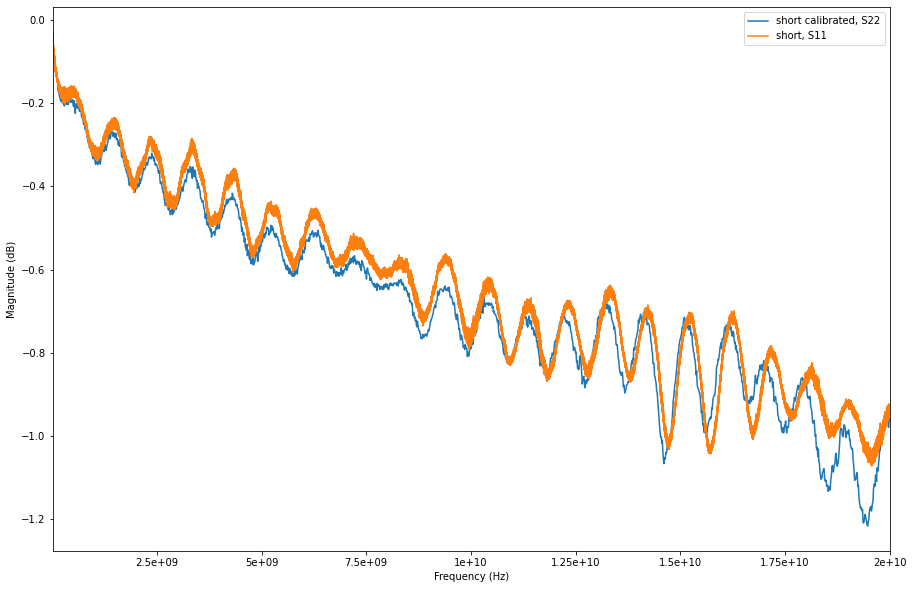

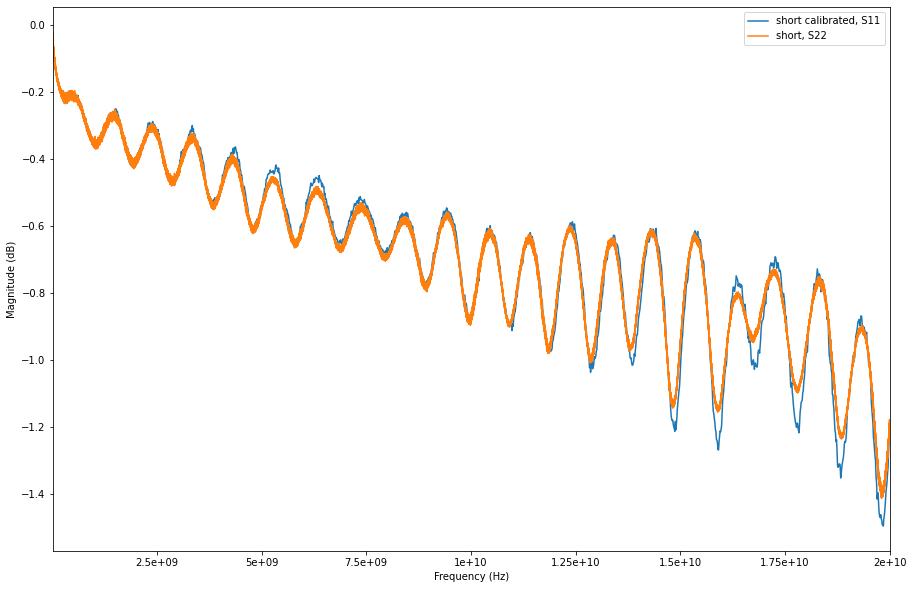

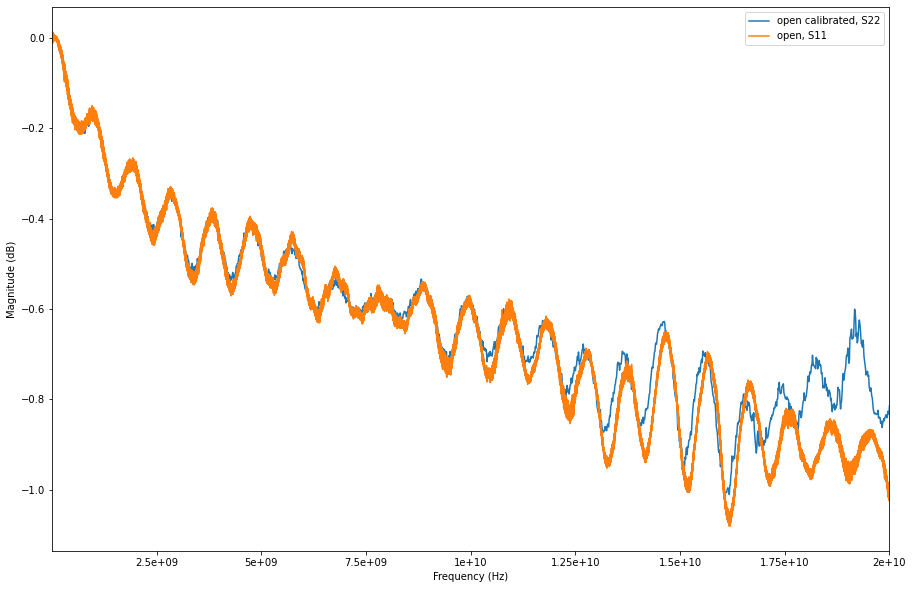

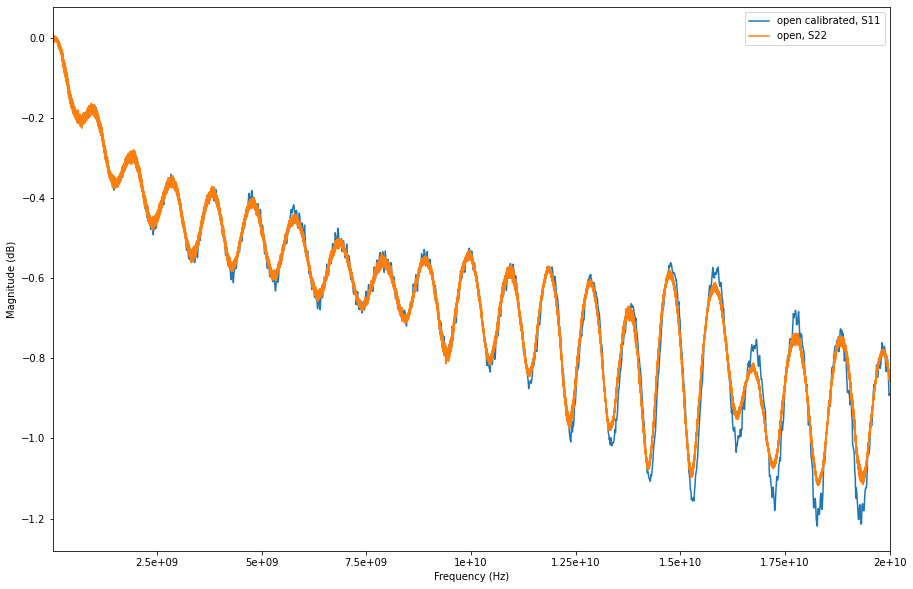

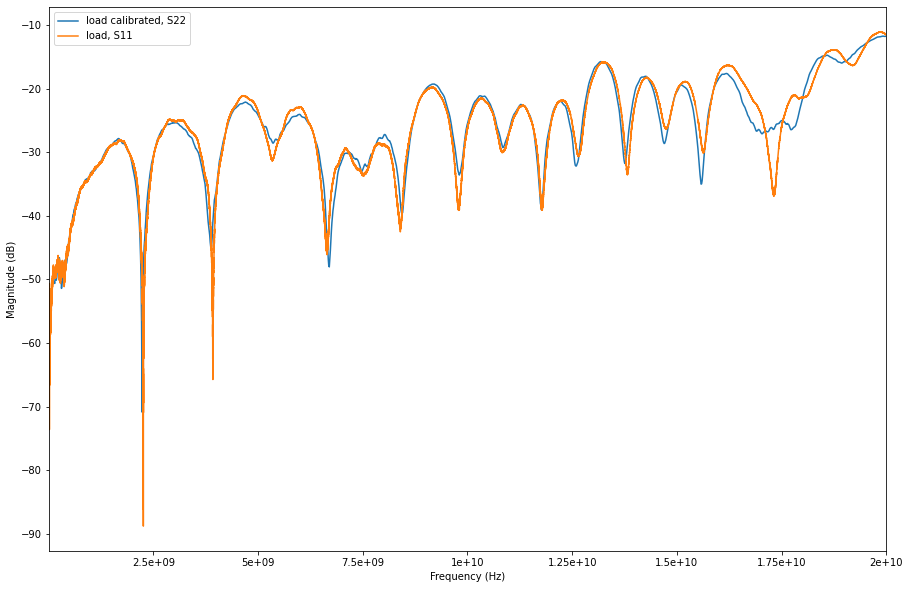

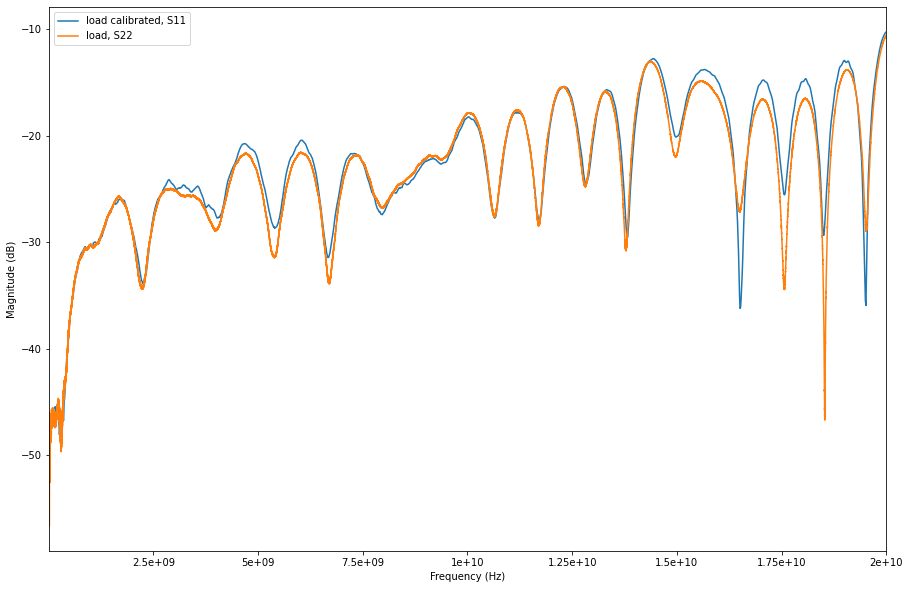

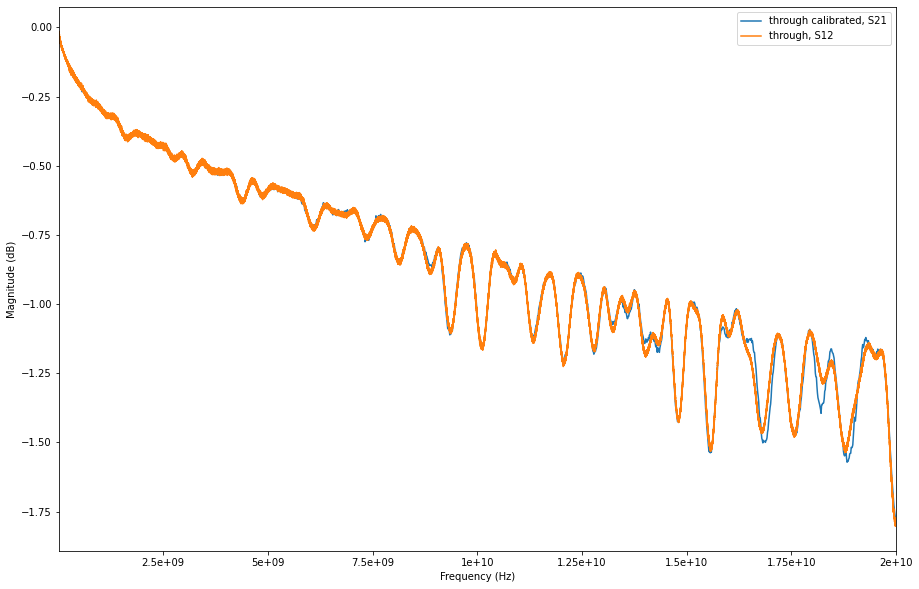

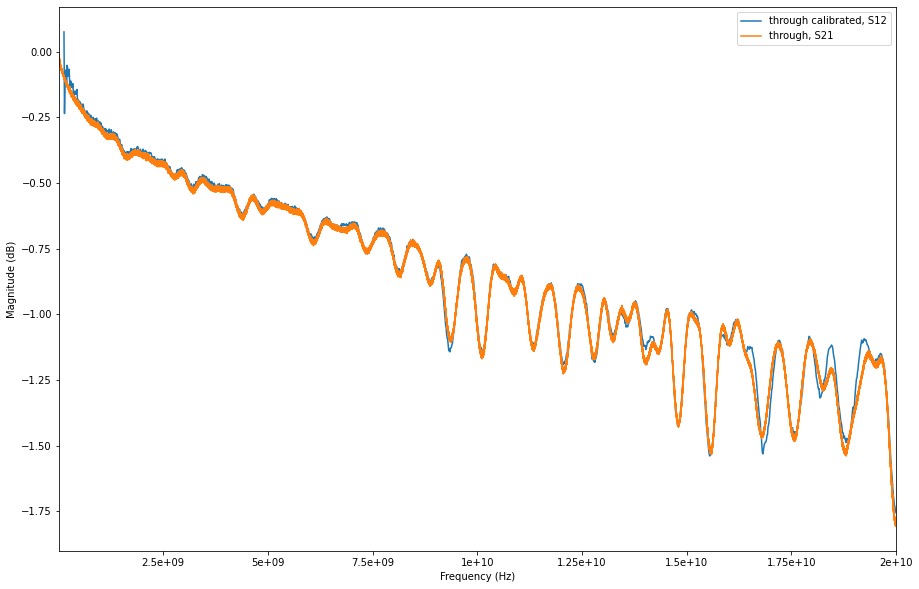

In [12]:
def testCal(ref, meas, cal, mm, nn):
    cmr=cal.apply_cal(meas)
    cmr.name=meas.name+' calibrated'
    cmr.plot_s_db(m=mm, n=nn)
    ref.plot_s_db(m=1-mm, n=1-nn)

r_short.name='short'
testCal(s_short, r_short, cal, 1, 1)
plt.figure()
testCal(s_short, r_short, cal, 0, 0)

plt.figure()
r_open.name='open'
testCal(s_open, r_open, cal, 1, 1)
plt.figure()
testCal(s_open, r_open, cal, 0, 0)

plt.figure()
r_load.name='load'
testCal(s_load, r_load, cal, 1, 1)
plt.figure()
testCal(s_load, r_load, cal, 0, 0)

plt.figure()
r_through.name='through'
testCal(s_through, r_through, cal, 1, 0)
plt.figure()
testCal(s_through, r_through, cal, 0, 1)

In [13]:
cks.write(b'S')
v.setPoints(1601)
m3_short=v.getScikitRfNetworkSparameters()

cks.write(b'O')
m3_open=v.getScikitRfNetworkSparameters()

cks.write(b'L')
m3_load=v.getScikitRfNetworkSparameters()

cks.write(b'T')
m3_through=v.getScikitRfNetworkSparameters()

100%|██████████| 4/4 [01:24<00:00, 21.07s/it]


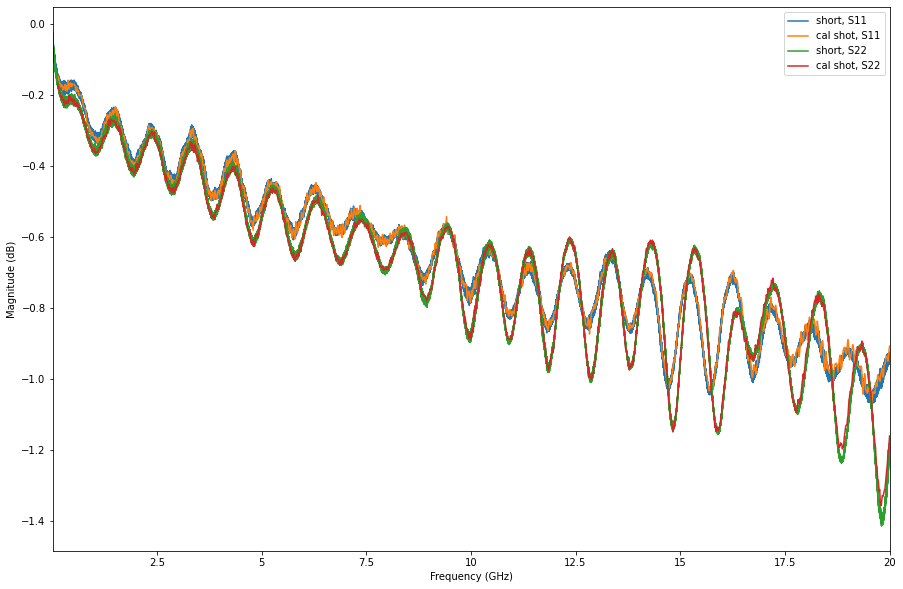

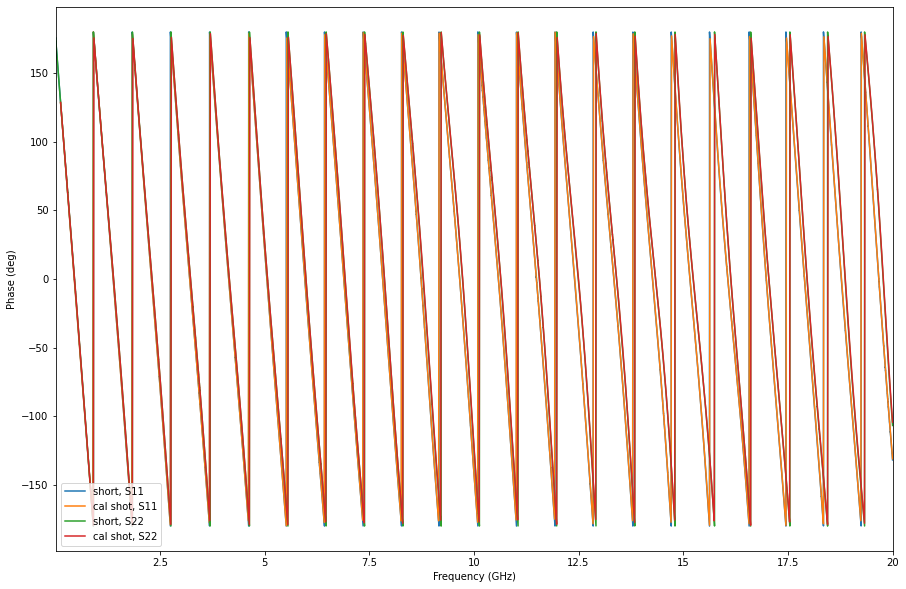

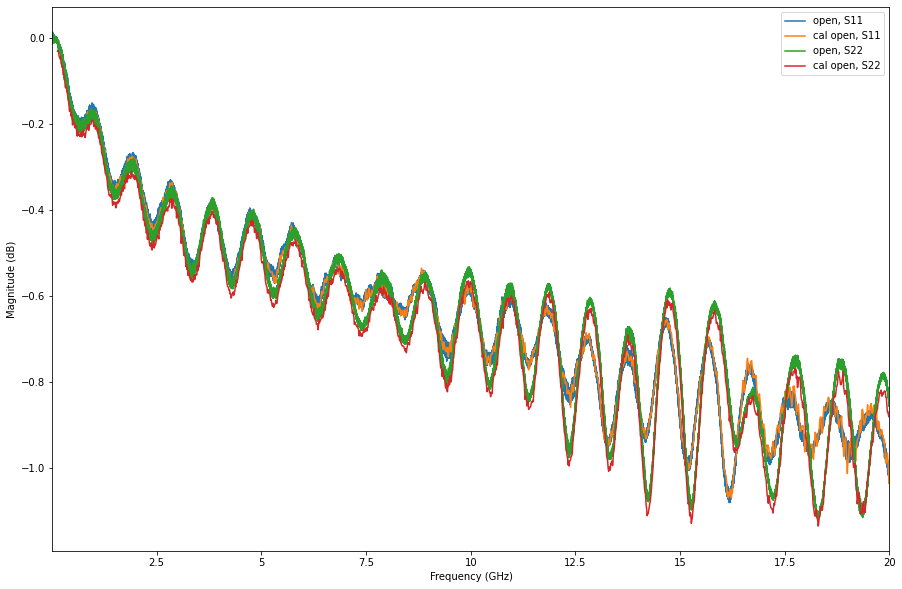

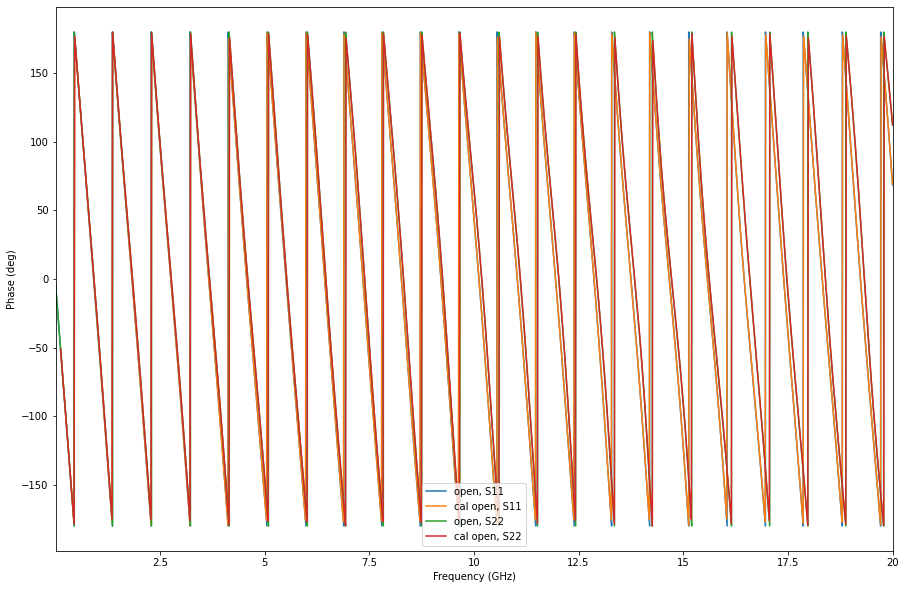

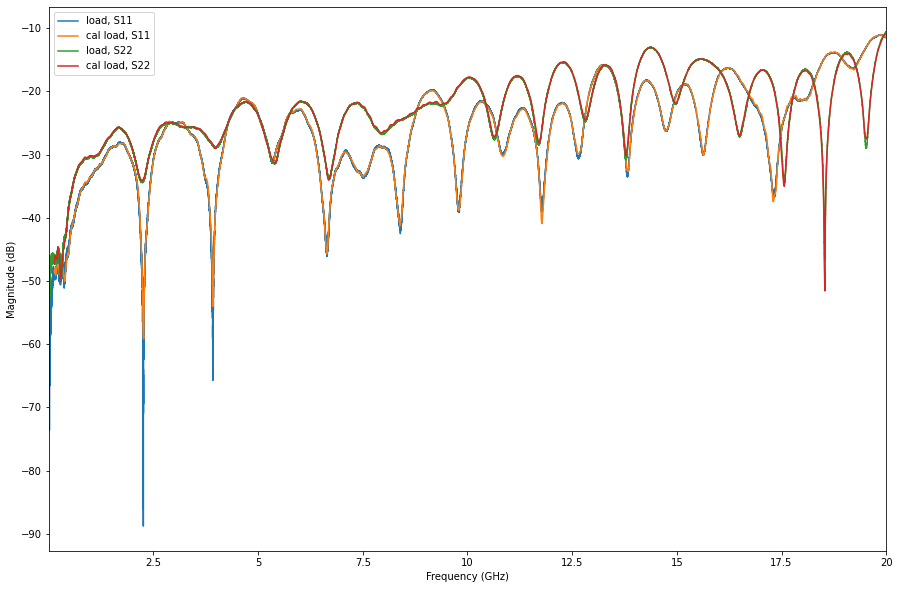

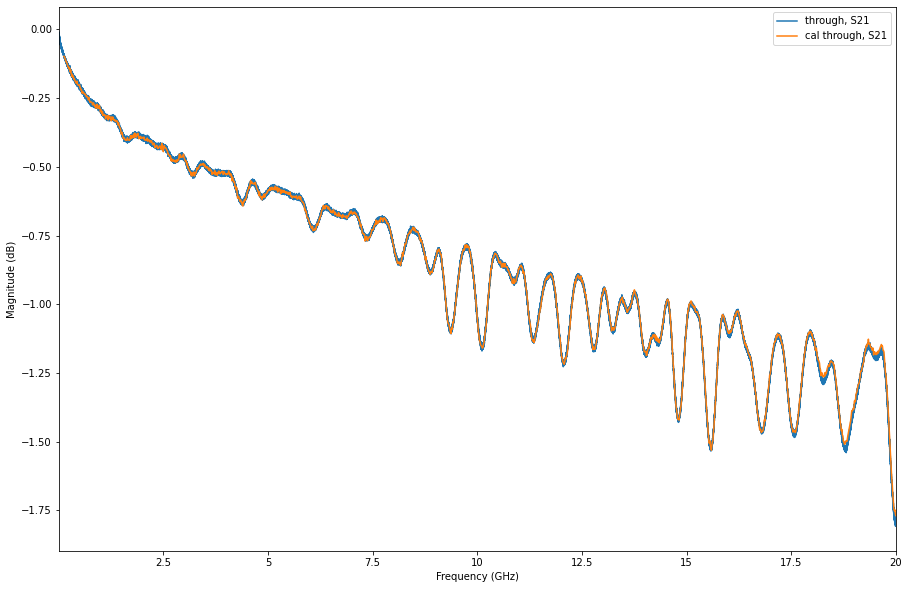

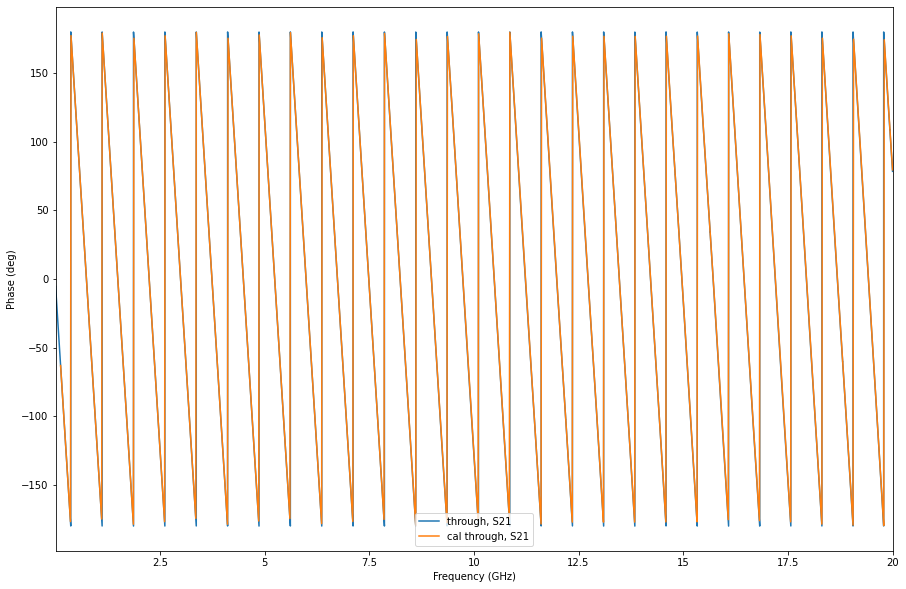

In [16]:
from skrf.calibration import TwelveTerm
import numpy as np


cal_short = cal.apply_cal(m3_short)
cal_short.name='cal shot'

cal_open = cal.apply_cal(m3_open)
cal_open.name='cal open'

cal_load = cal.apply_cal(m3_load)
cal_load.name='cal load'

cal_through = cal.apply_cal(m3_through)
cal_through.name='cal through'


s_short.plot_s_db(m=0,n=0)
cal_short.plot_s_db(m=0,n=0)
s_short.plot_s_db(m=1,n=1)
cal_short.plot_s_db(m=1,n=1)

plt.figure()
s_short.plot_s_deg(m=0,n=0)
cal_short.plot_s_deg(m=0,n=0)
s_short.plot_s_deg(m=1,n=1)
cal_short.plot_s_deg(m=1,n=1)



plt.figure()
s_open.plot_s_db(m=0,n=0)
cal_open.plot_s_db(m=0,n=0)
s_open.plot_s_db(m=1,n=1)
cal_open.plot_s_db(m=1,n=1)

plt.figure()
s_open.plot_s_deg(m=0,n=0)
cal_open.plot_s_deg(m=0,n=0)
s_open.plot_s_deg(m=1,n=1)
cal_open.plot_s_deg(m=1,n=1)



plt.figure()
s_load.plot_s_db(m=0,n=0)
cal_load.plot_s_db(m=0,n=0)
s_load.plot_s_db(m=1,n=1)
cal_load.plot_s_db(m=1,n=1)

plt.figure()
s_through.plot_s_db(m=1,n=0)
cal_through.plot_s_db(m=1,n=0)

plt.figure()
s_through.plot_s_deg(m=1,n=0)
cal_through.plot_s_deg(m=1,n=0)

In [17]:
att21db=v.getScikitRfNetworkSparameters()

100%|██████████| 4/4 [01:24<00:00, 21.05s/it]


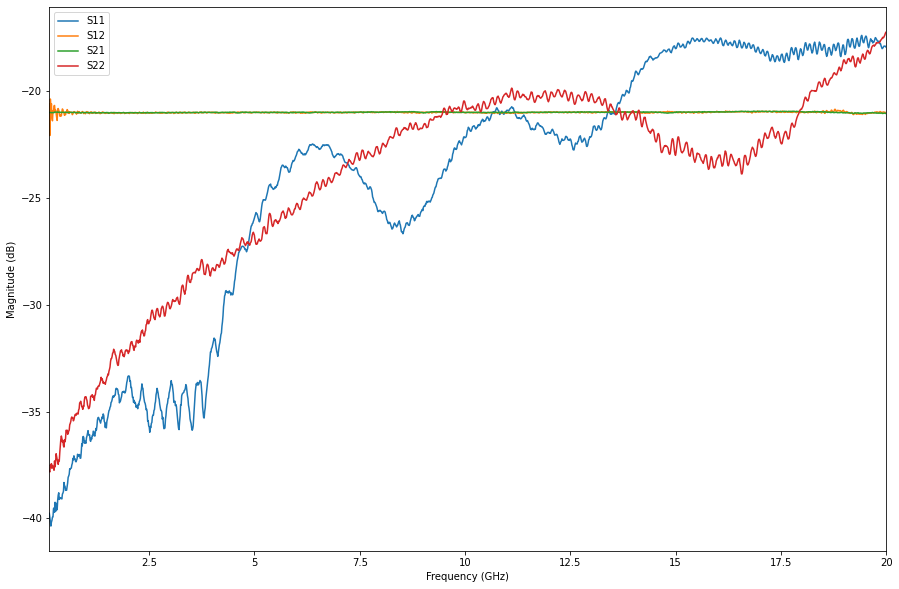

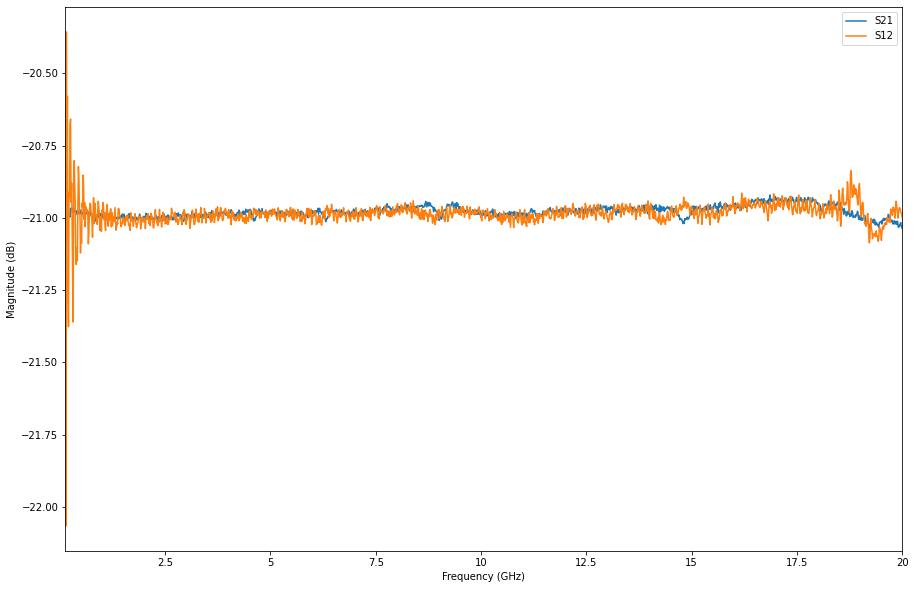

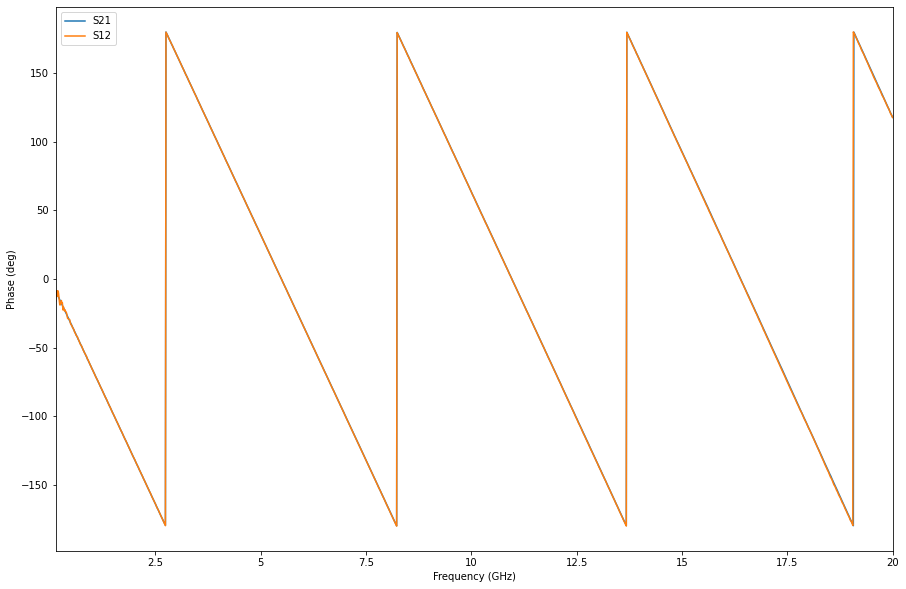

In [19]:
ac=cal.apply_cal(att21db)
ac.plot_s_db()
plt.figure()
ac.plot_s_db(m=1, n=0)
ac.plot_s_db(m=0, n=1)
plt.figure()
ac.plot_s_deg(m=1, n=0)
ac.plot_s_deg(m=0, n=1)

In [20]:
bull=v.getScikitRfNetworkSparameters()

100%|██████████| 4/4 [01:24<00:00, 21.05s/it]


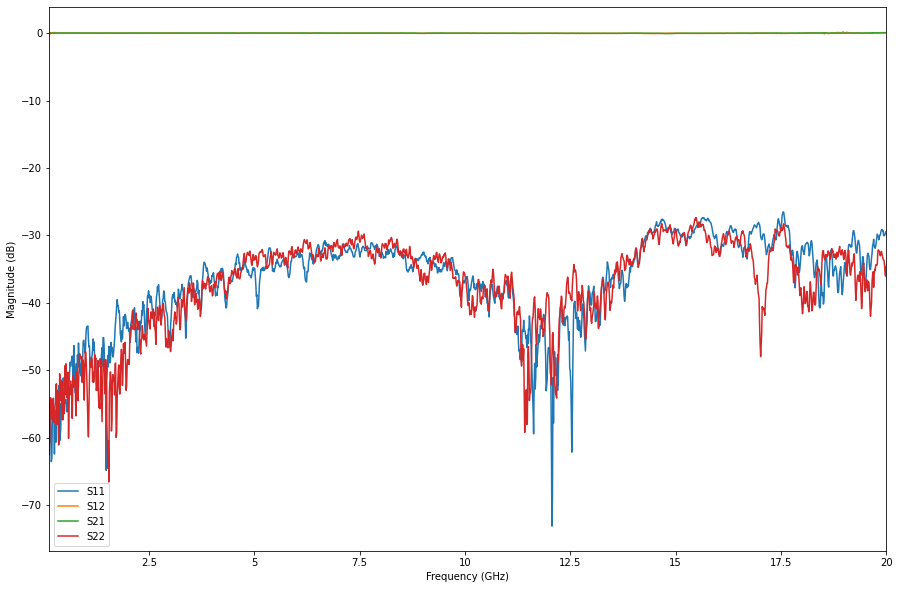

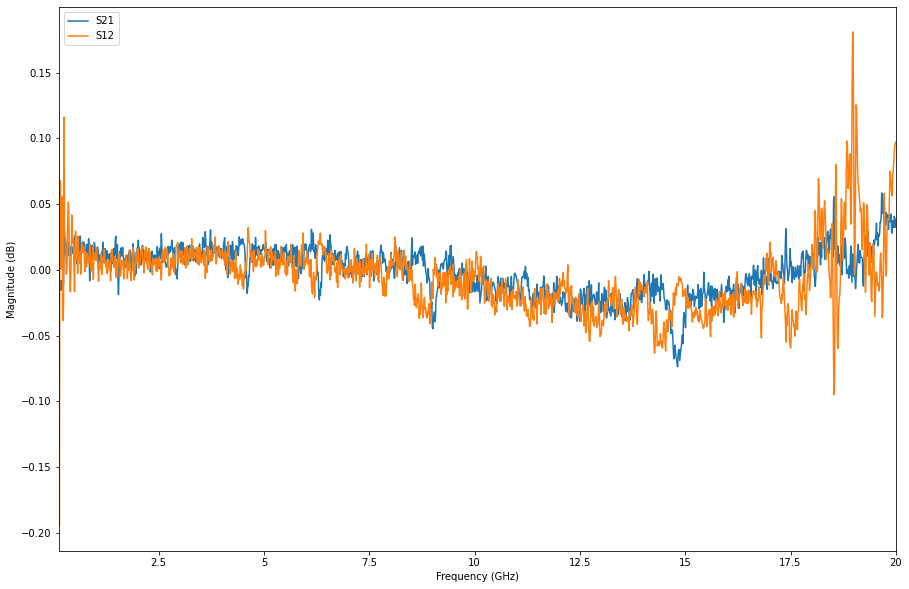

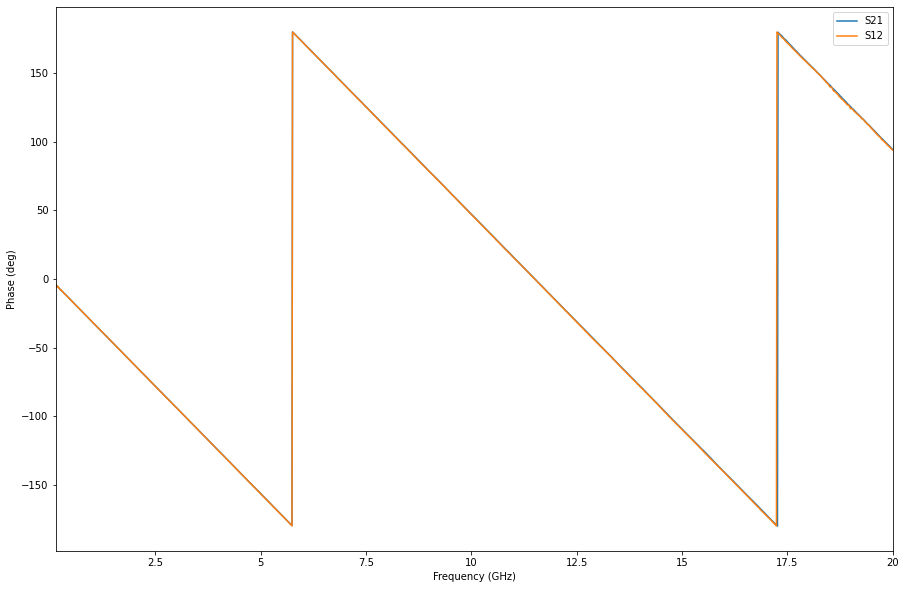

In [21]:
ac=cal.apply_cal(bull)
ac.plot_s_db()
plt.figure()
ac.plot_s_db(m=1, n=0)
ac.plot_s_db(m=0, n=1)
plt.figure()
ac.plot_s_deg(m=1, n=0)
ac.plot_s_deg(m=0, n=1)

In [22]:
cks.write(b'S')
v.setPoints(1601)
m_short=v.getScikitRfNetworkSparameters()
m_short.write_touchstone('cal_current/short3.s2p')

cks.write(b'O')
m_open=v.getScikitRfNetworkSparameters()
m_open.write_touchstone('cal_current/open3.s2p')

cks.write(b'L')
m_load=v.getScikitRfNetworkSparameters()
m_load.write_touchstone('cal_current/load3.s2p')

cks.write(b'T')
m_through=v.getScikitRfNetworkSparameters()
m_through.write_touchstone('cal_current/through3.s2p')


measured=[m_short, m_open, m_load, m_through]

100%|██████████| 4/4 [01:24<00:00, 21.10s/it]


In [23]:
m_short=rf.Network('cal_current/short3.s2p')
m_open=rf.Network('cal_current/open3.s2p')
m_load=rf.Network('cal_current/load3.s2p')
m_through=rf.Network('cal_current/through3.s2p')

measured=[m_short, m_open, m_load, m_through]
cal2 = TwelveTerm(ideals = ideals, measured = measured)
cal2.run()

Success
Success
Success
Success


/home/bjohan/.local/lib/python3.8/site-packages/skrf/calibration/calibration.py:1454: UserWarning: n_thrus is None, guessing which stds are transmissive
  warn('n_thrus is None, guessing which stds are transmissive')


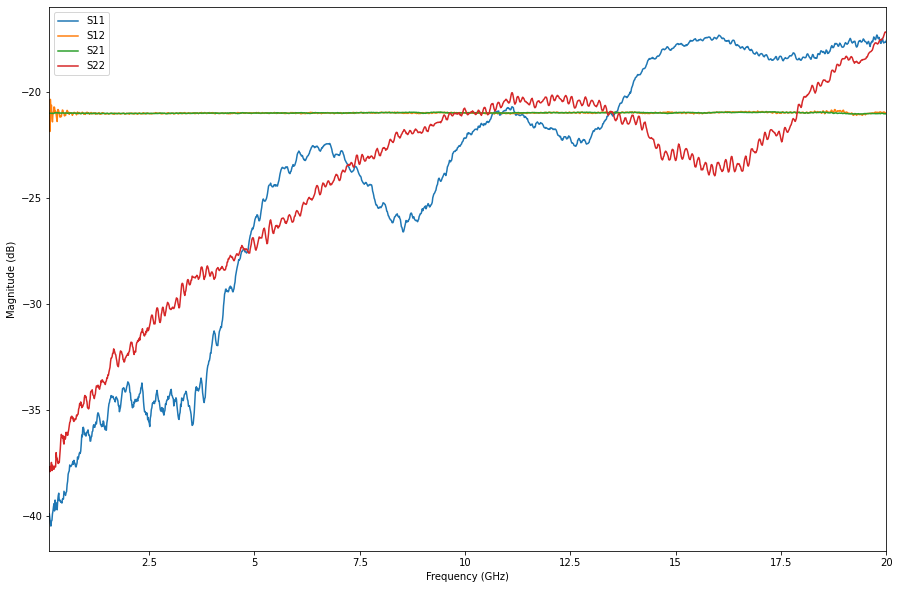

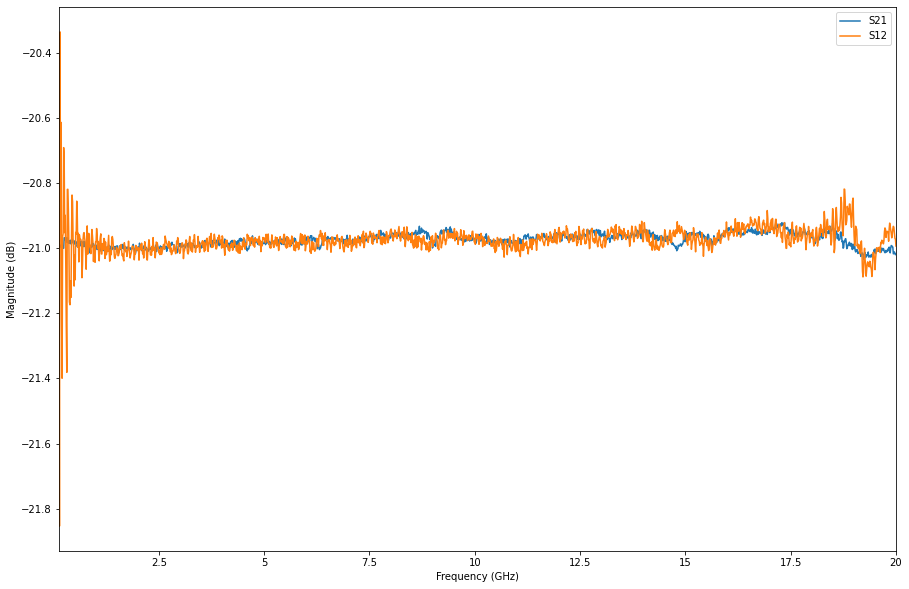

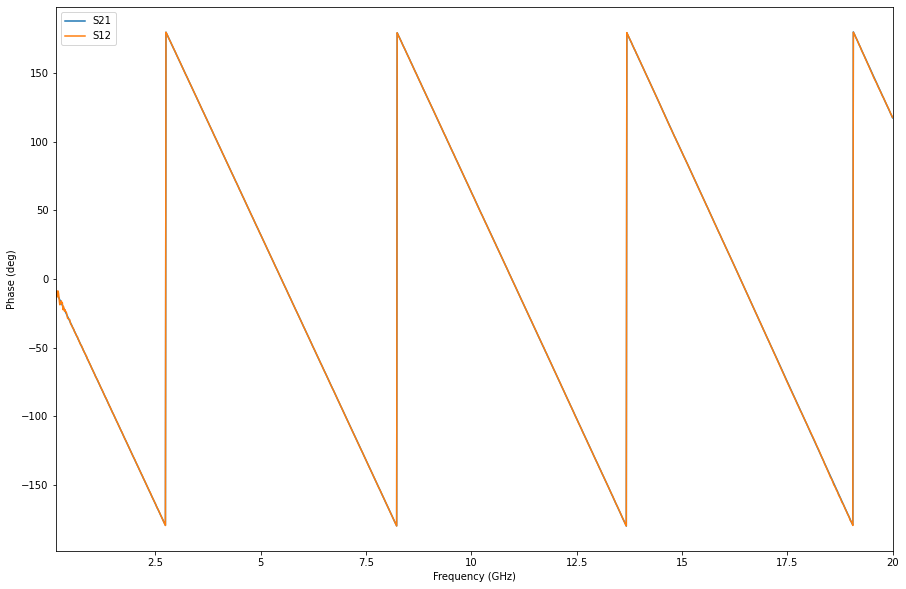

In [24]:
ac=cal2.apply_cal(att21db)
ac.plot_s_db()
plt.figure()
ac.plot_s_db(m=1, n=0)
ac.plot_s_db(m=0, n=1)
plt.figure()
ac.plot_s_deg(m=1, n=0)
ac.plot_s_deg(m=0, n=1)

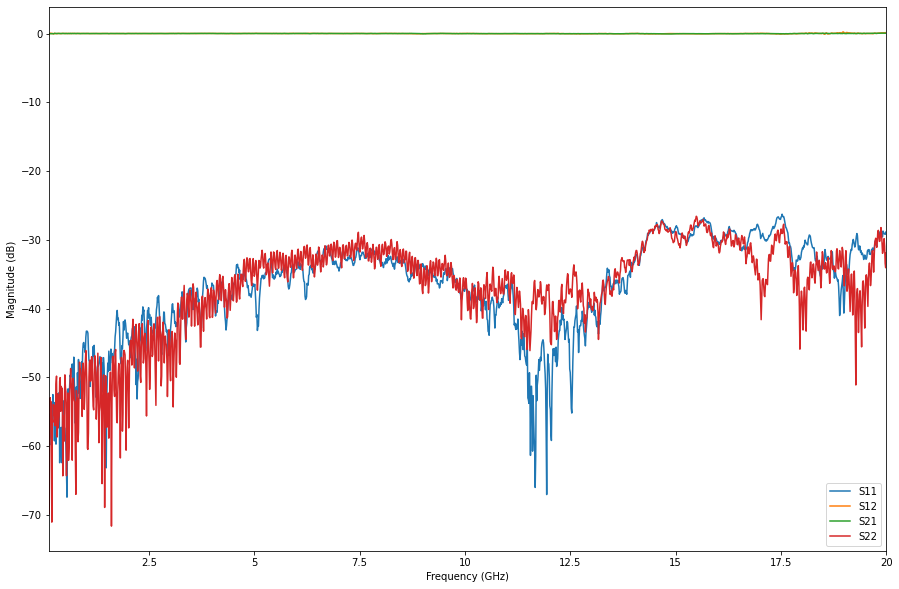

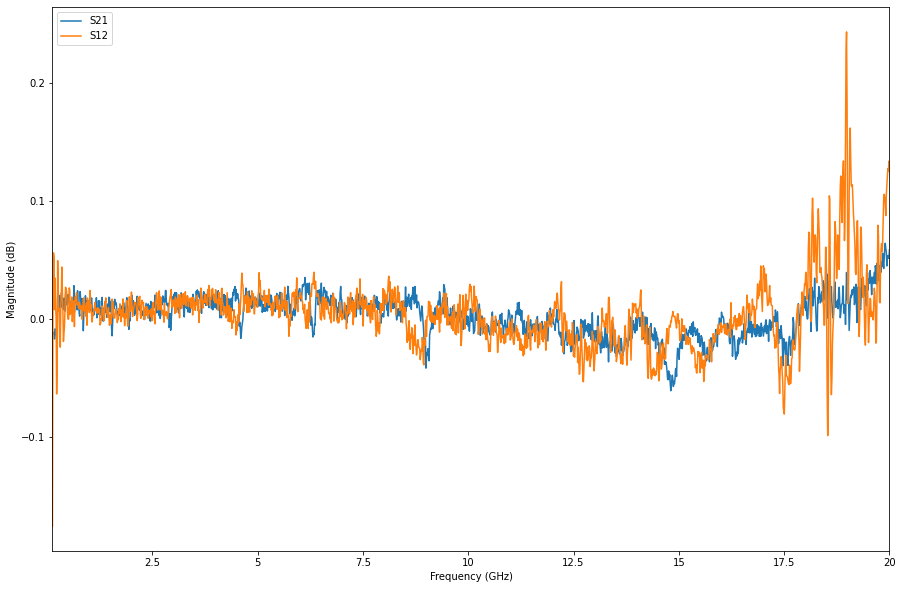

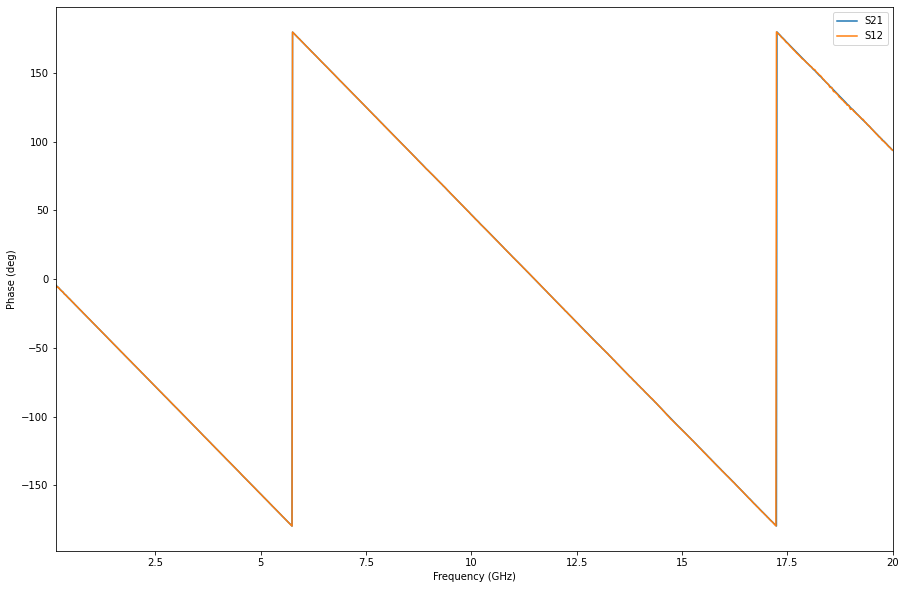

In [25]:
ac=cal2.apply_cal(att21dbl)
ac.plot_s_db()
plt.figure()
ac.plot_s_db(m=1, n=0)
ac.plot_s_db(m=0, n=1)
plt.figure()
ac.plot_s_deg(m=1, n=0)
ac.plot_s_deg(m=0, n=1)